In [150]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [100]:
data = pd.read_csv('./diamonds.csv')
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
30691,30692,0.40,Premium,F,SI1,62.3,60.0,737,4.70,4.74,2.94
25868,25869,2.01,Good,H,SI2,62.2,57.0,14956,8.05,8.10,5.03
6885,6886,1.06,Very Good,I,SI2,62.8,56.0,4132,6.47,6.55,4.09
15609,15610,1.54,Good,E,I1,63.3,60.0,6261,7.26,7.30,4.61
13623,13624,1.08,Good,E,SI1,58.4,60.0,5575,6.71,6.74,3.93


In [101]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [112]:
columns = ['cut','color','clarity']
for col in columns:
    print(f'{col}:{data[col].unique()}')

cut:[1 2 3 4 5]
color:[1 2 3 7 4 5 6]
clarity:[1 2 3 4 5 6 7 8]


In [108]:
color = {'E':1,'I':2,'J':3,'F':4,'G':5,'D':6,'H':7}
data.color = [color[item] for item in data.color]
data.sample(5)

KeyError: 1

In [109]:
cut = {'Ideal':1,'Premium':2,'Good':3,'Very Good':4,'Fair':5}
data.cut = [cut[item] for item in data.cut]

In [111]:
clarity = {'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5 ,'VVS1':6 ,'I1':7, 'IF':8}
data.clarity = [clarity[item] for item in data.clarity]

In [113]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
22021,22022,0.35,1,2,6,61.6,55.0,628,4.55,4.58,2.81
27869,27870,0.38,2,4,2,62.0,58.0,653,4.60,4.63,2.86
34778,34779,0.41,1,6,1,62.7,55.0,876,4.75,4.72,2.97
5111,5112,0.72,1,4,3,61.3,56.0,3759,5.74,5.78,3.54
16374,16375,0.33,4,6,2,62.8,55.0,608,4.41,4.45,2.78


In [114]:
data = data.drop('Unnamed: 0',axis=1)


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['depth','table','price','x','y','z']
data[col] = scaler.fit_transform(data[col])



In [134]:
x = data.drop('clarity',axis=1).values
y = data.clarity.values

In [135]:
y.shape

(53940,)

In [136]:
x[5,:]

array([2.40000000e-01, 4.00000000e+00, 3.00000000e+00, 5.50000000e-01,
       2.69230769e-01, 5.40628210e-04, 3.66852886e-01, 6.72325976e-02,
       7.79874214e-02])

In [137]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
X_train.shape

(43152, 9)

In [152]:
X_train[1,:]

array([0.34      , 1.        , 5.        , 0.53333333, 0.26923077,
       0.02373358, 0.41620112, 0.075382  , 0.08710692])

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
k_rannge = range(1,10)
score = {}
scoreList = []
for k in k_rannge:
    clf = KNeighborsClassifier(n_neighbors=k,p = 2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score[k] = accuracy_score(y_pred,y_test)
    scoreList.append(accuracy_score(y_pred,y_test)) 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


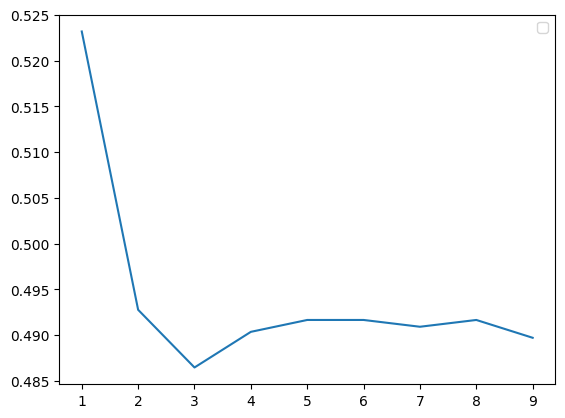

In [151]:
plt.plot(k_rannge,scoreList)
plt.legend()